<a href="https://colab.research.google.com/github/Mohammed70S/KERAS/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


In [ ]:

# Load the dataset
data = pd.read_excel('orbit.xlsx')

In [ ]:
# Check the transformed dataset
data.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [ ]:
# Check for missing values
data.isnull().sum()


,0
time_steps,0
y,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_steps  2000 non-null   float64
 1   y           2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [ ]:
# Load dataset
df = pd.read_excel('orbit.xlsx')

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example)
df = df.dropna()  # or use imputation

# Normalize data
scaler = MinMaxScaler()
df[['time_steps', 'y']] = scaler.fit_transform(df[['time_steps', 'y']])


time_steps    0
y             0
dtype: int64


In [ ]:
# Split data into features and target
X = df[['time_steps']].values
y = df['y'].values

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create neural network model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # First hidden layer with ELU activation
model.add(Dense(64, activation='relu'))                # Second hidden layer with ELU activation
model.add(Dense(1, activation='linear'))              # Output layer with linear activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1371 - val_loss: 0.0863
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0874 - val_loss: 0.0722
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0744 - val_loss: 0.0561
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0552 - val_loss: 0.0414
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0422 - val_loss: 0.0272
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0267 - val_loss: 0.0156
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147 - val_loss: 0.0083
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - val_loss: 0.0043
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - val_loss: 9.2606e-04
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

In [ ]:
# Evaluate model
y_pred = model.predict(X_val)

# Flatten y_pred to make it a 1D array
y_pred = y_pred.flatten()

# Calculate metrics
mse = np.mean((y_pred - y_val) ** 2)
mae = np.mean(np.abs(y_pred - y_val))
ss_res = np.sum((y_val - y_pred) ** 2)
ss_tot = np.sum((y_val - np.mean(y_val)) ** 2)

print(f'SS_res: {ss_res}, SS_tot: {ss_tot}')

if ss_tot == 0:
    print("Warning: Total sum of squares (SS_tot) is zero. R-squared may not be meaningful.")
    r_squared = np.nan  # or some other value indicating an undefined state
else:
    r_squared = 1 - (ss_res / ss_tot)

print(f'MSE: {mse}, MAE: {mae}, R-squared: {r_squared}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
SS_res: 0.0012934559212615204, SS_tot: 33.08661294741576
MSE: 3.233639803153801e-06, MAE: 0.0014670199446470409, R-squared: 0.9999609069709458


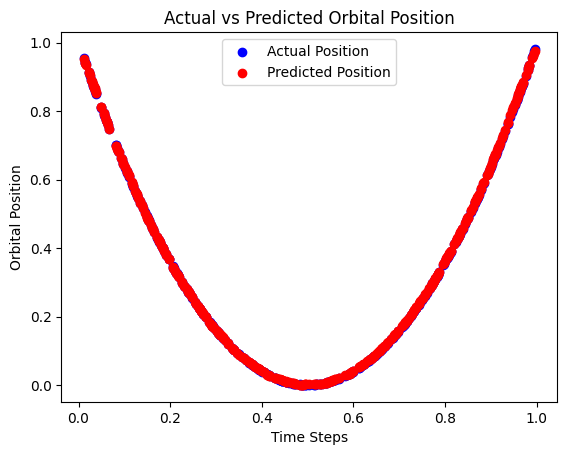

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.scatter(X_val, y_val, color='blue', label='Actual Position')
plt.scatter(X_val, y_pred, color='red', label='Predicted Position')
plt.xlabel('Time Steps')
plt.ylabel('Orbital Position')
plt.title('Actual vs Predicted Orbital Position')
plt.legend()
plt.show()

# Save the plot as a PNG file
plt.savefig('_actual_vs_predicted.png', format='png')
